# CSC-321: Data Mining and Machine Learning
# Manav Bilakhia

## Assignment 4: Logistic Regression

### Part 1: Prediction

Everything so far has been a regression task - predicting a numeric value. We've moved on to talk about classification in class, so let's implement our first basic binary classifier. This is the same idea as linear regression, but we're going to predict one of two binary classes, using logistic regression.

The general outline for logistic regression is the same as for multivariate linear regression. We're going to need a function to make predictions, and a function to learn coefficients. 

(a) The formula for making a prediction, predY, for logistic regression is:

predY = 1.0 / 1.0 + e^-(b0 + b1 * x1 + ... + bN * xN)

Where b0 is the intercept or bias, bN is the coefficient for the input variable xN, and e is the base of the natural logarithms, or Euler's number. We can use the python math library which has an implementation of e called math.exp(x): https://docs.python.org/3/library/math.html

The formula given above is an implementation of a sigmoid function (a commonly used, s-shaped function that can take any input value and produce a number between 0 and 1).

We will assume there can be multiple input features (x1, x2 etc) not just a single value, and that each input feature will have a corresponding coefficient (b1, b2 etc).

Write your predict function, that will take a single instance, and a list of coefficients, and return a prediction. In the list of coefficients, assume coefficient[0] corresponds to b0. This will be very similar to your predict function from last week.

    

In [ ]:
# Write your predict function here
import math

def predict(row, coefficients):
    # initialize prediction with the intercept coefficient
    predY = coefficients[0]
    # iterate over each input feature and its corresponding coefficient
    for i in range(len(row)):
        predY += coefficients[i+1] * row[i]
    # calculate the sigmoid of the prediction
    return 1.0 / (1.0 + math.exp(-predY))


We can test your predict function on the contrived dataset below. It includes TWO input features (we shall call x1 and x2) and a class feature (y) for each instance. The class is either 0 or 1.

(b) Graph the instances in this data, x1 (on the x axis) against x2 (on the y axis), using different colored points for the two classes. You may choose the colors. Use axes ranges of 0-10 on the x, and -1 to 6 on the y.

(c) Call your predict function on each instance in the contrived data set, using the coefficients given below. Get the predicted class from your function, and print (for each instance), the expected class, the predicted value AND the predicted class. In order to get the predicted class from the value predicted, we need to do rounding. There is a round() function that can help you. If it works correctly, you should predict the correct class of each instance in the dataset.

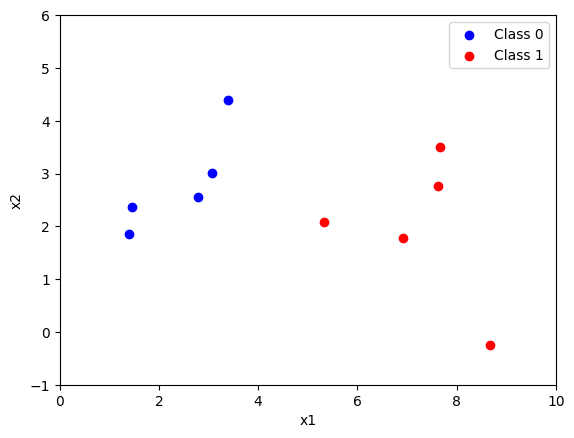

Expected: 0, Predicted value: 0.2987569855650975, Predicted class: 0
Expected: 0, Predicted value: 0.14595105593031163, Predicted class: 0
Expected: 0, Predicted value: 0.08533326519733725, Predicted class: 0
Expected: 0, Predicted value: 0.21973731424800344, Predicted class: 0
Expected: 0, Predicted value: 0.24705900008926596, Predicted class: 0
Expected: 1, Predicted value: 0.9547021347460022, Predicted class: 1
Expected: 1, Predicted value: 0.8620341905282771, Predicted class: 1
Expected: 1, Predicted value: 0.9717729050420985, Predicted class: 1
Expected: 1, Predicted value: 0.9992954520878627, Predicted class: 1
Expected: 1, Predicted value: 0.9054893228110497, Predicted class: 1


In [ ]:
# Here's the contrived data set

dataset = [[2.7810836,2.550537003,0],
    [1.465489372,2.362125076,0],
    [3.396561688,4.400293529,0],
    [1.38807019,1.850220317,0],
    [3.06407232,3.005305973,0],
    [7.627531214,2.759262235,1],
    [5.332441248,2.088626775,1],
    [6.922596716,1.77106367,1],
    [8.675418651,-0.242068655,1],
    [7.673756466,3.508563011,1]]


# Do the graphing here
import matplotlib.pyplot as plt

# split the dataset by class value
class0 = [row for row in dataset if row[-1] == 0]
class1 = [row for row in dataset if row[-1] == 1]

# plot the data points
fig, ax = plt.subplots()
ax.scatter([row[0] for row in class0], [row[1] for row in class0], color='blue', label='Class 0')
ax.scatter([row[0] for row in class1], [row[1] for row in class1], color='red', label='Class 1')

# set axis labels and ranges
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_xlim([0, 10])
ax.set_ylim([-1, 6])

# show the legend
ax.legend()

# show the plot
plt.show()

# Call your predict function on the data here, using the following coefficients

coef = [-0.406605464, 0.852573316, -1.104746259]

# Go through each instance of X_train, and get a predicted y value
# Print out the predicted y, and the corresponding actual y from y_train

for row in dataset:
    # get the expected class from the last column
    expected = row[-1]
    row = [row[0], row[1]]
    # get the predicted value using the predict function
    predicted = predict(row, coef)
    # round the predicted value to get the predicted class
    predicted_class = round(predicted)
    # print the results
    print(f'Expected: {expected}, Predicted value: {predicted}, Predicted class: {predicted_class}')


### Part 2: Learning coefficients

(d) Above I gave you coefficients. Just as with MLR, we need to estimate the coefficients for a data set. To do that, we're going to use stochastic gradient descent. The algorithm is exactly the same as for multivariate linear regression except for the following two things.

b0 is computed by:

b0 = b0 + learning_rate * error * predictedY * (1.0 - predictedY)

and bN is computed by:

bN = bN + learning_rate * error * predictedY * (1.0 - predictedY) * xN

for all coefficients b1..bN

To **calculate the error**, we run the algorithm with default coefficients and perform prediction, then get the error by subtracting the **predictedY** from the **actual Y value**. This is the opposite way around to last week. I'm just keeping you on your toes (actually, I've reversed the gradient. You're welcome).

Refer back to Assignment 3 for the complete algorithm

(e) Apply your coefficient learning function to the contrived dataset given above, using the learning rate of 0.3, and 100 epochs. Print the resulting coefficients. I've shown the last 5 epochs of my code over this example, so you can check your code. YOUR OUTPUT SHOULD BE THE SAME VALUES.


In [ ]:
# Write your function sgd_log(X_train, y_train, learning_rate, epochs) here
def sgd_log(X_train, y_train, learning_rate, epochs):
    # initialize the coefficients to 0
    coefficients = [0.0 for i in range(len(X_train[0])+1)]
    for epoch in range(epochs):
        sum_error = 0.0
        for i in range(len(X_train)):
            # get the predicted value for the instance
            predicted_value = predict(X_train[i], coefficients)
            # calculate the error for the instance
            error = y_train[i] - predicted_value
            sum_error += error**2
            # update the bias and coefficients
            coefficients[0] = coefficients[0] + learning_rate * error * predicted_value * (1.0 - predicted_value)
            for j in range(len(X_train[i])):
                coefficients[j+1] = coefficients[j+1] + learning_rate * error * predicted_value * (1.0 - predicted_value) * X_train[i][j]
        print(f'epoch= {epoch}, lrate= {learning_rate:.3f}, error= {sum_error:.3f}') # should I be using error or sum error? it seems to be a bit ambigous in the prompt above. 
    return coefficients




# Call your function using the parameters given here. 
X_train = [row[:-1] for row in dataset]
y_train = [row[-1] for row in dataset]
learning_rate = 0.3
epochs = 100
coefficients = sgd_log(X_train, y_train, learning_rate, epochs)
print (coefficients)

# Example output
#
#>epoch=95, lrate=0.300, error=0.023
#>epoch=96, lrate=0.300, error=0.023
#>epoch=97, lrate=0.300, error=0.023
#>epoch=98, lrate=0.300, error=0.023
#>epoch=99, lrate=0.300, error=0.022


epoch= 0, lrate= 0.300, error= 2.217
epoch= 1, lrate= 0.300, error= 1.613
epoch= 2, lrate= 0.300, error= 1.113
epoch= 3, lrate= 0.300, error= 0.827
epoch= 4, lrate= 0.300, error= 0.623
epoch= 5, lrate= 0.300, error= 0.494
epoch= 6, lrate= 0.300, error= 0.412
epoch= 7, lrate= 0.300, error= 0.354
epoch= 8, lrate= 0.300, error= 0.310
epoch= 9, lrate= 0.300, error= 0.276
epoch= 10, lrate= 0.300, error= 0.248
epoch= 11, lrate= 0.300, error= 0.224
epoch= 12, lrate= 0.300, error= 0.205
epoch= 13, lrate= 0.300, error= 0.189
epoch= 14, lrate= 0.300, error= 0.174
epoch= 15, lrate= 0.300, error= 0.162
epoch= 16, lrate= 0.300, error= 0.151
epoch= 17, lrate= 0.300, error= 0.142
epoch= 18, lrate= 0.300, error= 0.134
epoch= 19, lrate= 0.300, error= 0.126
epoch= 20, lrate= 0.300, error= 0.119
epoch= 21, lrate= 0.300, error= 0.113
epoch= 22, lrate= 0.300, error= 0.108
epoch= 23, lrate= 0.300, error= 0.103
epoch= 24, lrate= 0.300, error= 0.098
epoch= 25, lrate= 0.300, error= 0.094
epoch= 26, lrate= 0.30

### Part 3: Classification algorithms

(f) Now you have sufficient functionality to write a function to make predictions using logistic regression. Create a function with the signature log_reg(X_train, y_train, X_test, learning_rate, epochs). 

We're going to use the same dataset here for both training and testing, even though we know that might not be a great idea.

Here's the log_reg algorithm. We're going to estimate our coefficients from the training data, using the function from (d) above, and we'll print them out. We're going to create a new list, to hold our predictions. Then for each entry in the testing data, we're going to read the input value, and make a prediction, using our function from (a). For each entry in the test data, we're going to append our predicted y class to the prediction list. In order to predict the class correctly, we need to round our score, as above, before appending it. We're going to return our list of predictions.

In [ ]:
# Write your function log_reg(X_train, y_train, X_test, learning_rate, epochs) here

def log_reg(X_train, y_train, X_test, learning_rate, epochs):
    # estimate coefficients using stochastic gradient descent
    coefficients = sgd_log(X_train, y_train, learning_rate, epochs)
    # make predictions on test data
    predictions = []
    for instance in X_test:
        pred_y = round(predict(instance, coefficients))
        predictions.append(pred_y)
    return predictions

X_train = [row[:-1] for row in dataset]
y_train = [row[-1] for row in dataset]
X_test = [row[:-1] for row in dataset]
y_test = [row[-1] for row in dataset]

# make predictions using logistic regression
predictions = log_reg(X_train, y_train, X_test, 0.3, 100)
print('Expected:', y_test)
print('Predicted:', predictions)

epoch= 0, lrate= 0.300, error= 2.217
epoch= 1, lrate= 0.300, error= 1.613
epoch= 2, lrate= 0.300, error= 1.113
epoch= 3, lrate= 0.300, error= 0.827
epoch= 4, lrate= 0.300, error= 0.623
epoch= 5, lrate= 0.300, error= 0.494
epoch= 6, lrate= 0.300, error= 0.412
epoch= 7, lrate= 0.300, error= 0.354
epoch= 8, lrate= 0.300, error= 0.310
epoch= 9, lrate= 0.300, error= 0.276
epoch= 10, lrate= 0.300, error= 0.248
epoch= 11, lrate= 0.300, error= 0.224
epoch= 12, lrate= 0.300, error= 0.205
epoch= 13, lrate= 0.300, error= 0.189
epoch= 14, lrate= 0.300, error= 0.174
epoch= 15, lrate= 0.300, error= 0.162
epoch= 16, lrate= 0.300, error= 0.151
epoch= 17, lrate= 0.300, error= 0.142
epoch= 18, lrate= 0.300, error= 0.134
epoch= 19, lrate= 0.300, error= 0.126
epoch= 20, lrate= 0.300, error= 0.119
epoch= 21, lrate= 0.300, error= 0.113
epoch= 22, lrate= 0.300, error= 0.108
epoch= 23, lrate= 0.300, error= 0.103
epoch= 24, lrate= 0.300, error= 0.098
epoch= 25, lrate= 0.300, error= 0.094
epoch= 26, lrate= 0.30



(g) Now we need a function for calculating accuracy. We need to keep count of how many predictions are correct. It will take a list of actual class values, and a list of predicted class values. If the actual value of an instance and the predicted value of an instance are the same, increment a counter. In the end, return the value of this counter divided by the length of the actual values list. Call this function accuracy.

(h) We also need a baseline function. Create a function called zeroRC(train, test). This function should take the training data, and find the most common value of Y in the training data. It should then return a list of predictions the same length as the test data, containing ONLY this value that was most common. It works very similarly to the zeroR function you've been using for linear regression.

(i) Apply logistic regression and zeroRC to the sample dataset. Use a learning rate of 0.3 and 100 epochs for logistic regression. Calculate accuracy for both algorithms, and print the results as a percentage accuracy. Give me a write up on the experiment below - which algorithm is better?

(j) See how the error rate for the SGD learned coefficients goes down? Write in the text box the error rate at iteration 100, and the error rate at iteration 10. Run the code with just 10 epochs. Does the accuracy of the overall classifier change? 


In [ ]:
# Do all the code here
def accuracy(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return (correct / float(len(actual))) * 100.0

def zeroRC(train, test):
    y_values = [row[-1] for row in train]
    most_common = max(set(y_values), key=y_values.count)
    predictions = [most_common for i in range(len(test))]
    return predictions

# Logistic Regression
X_train = [row[:-1] for row in dataset]
y_train = [row[-1] for row in dataset]
learning_rate = 0.3
epochs = 100
coefficients = sgd_log(X_train, y_train, learning_rate, epochs)
predictions_lr = []
for row in dataset:
    row = [row[0], row[1]]
    y_pred = predict(row, coef)
    y_pred_rounded = round(y_pred)
    predictions_lr.append(y_pred_rounded)
acc_lr = accuracy([row[-1] for row in dataset], predictions_lr)

# ZeroR Classifier
predictions_zr = zeroRC(dataset, dataset)
acc_zr = accuracy([row[-1] for row in dataset], predictions_zr)

# Print results
print("Logistic Regression Accuracy: %.2f%%" % acc_lr)
print("ZeroR Classifier Accuracy: %.2f%%" % acc_zr)


epoch= 0, lrate= 0.300, error= 2.217
epoch= 1, lrate= 0.300, error= 1.613
epoch= 2, lrate= 0.300, error= 1.113
epoch= 3, lrate= 0.300, error= 0.827
epoch= 4, lrate= 0.300, error= 0.623
epoch= 5, lrate= 0.300, error= 0.494
epoch= 6, lrate= 0.300, error= 0.412
epoch= 7, lrate= 0.300, error= 0.354
epoch= 8, lrate= 0.300, error= 0.310
epoch= 9, lrate= 0.300, error= 0.276
epoch= 10, lrate= 0.300, error= 0.248
epoch= 11, lrate= 0.300, error= 0.224
epoch= 12, lrate= 0.300, error= 0.205
epoch= 13, lrate= 0.300, error= 0.189
epoch= 14, lrate= 0.300, error= 0.174
epoch= 15, lrate= 0.300, error= 0.162
epoch= 16, lrate= 0.300, error= 0.151
epoch= 17, lrate= 0.300, error= 0.142
epoch= 18, lrate= 0.300, error= 0.134
epoch= 19, lrate= 0.300, error= 0.126
epoch= 20, lrate= 0.300, error= 0.119
epoch= 21, lrate= 0.300, error= 0.113
epoch= 22, lrate= 0.300, error= 0.108
epoch= 23, lrate= 0.300, error= 0.103
epoch= 24, lrate= 0.300, error= 0.098
epoch= 25, lrate= 0.300, error= 0.094
epoch= 26, lrate= 0.30

**Write up your observations on the experiment here**

**DO NOT FORGET TO WRITE THINGS HERE**



### Part 4: Introduction to scikit-learn

One of the most popular open-source python machine learning libraries is scikit-learn. You can find out more in general at: https://scikit-learn.org/stable/index.html

This time, I'm only doing the bare minimum. I'll load the relevant models from scikit-learn, but it's up to you to train and test them, and report the scores appropriately. I also want you to generate a confusion matrix.

Do the following:
- Train the SGD Classifier, using the fit method (note: I'm using the 'log' loss parameter, which means it will behave as logistic regression. There are other options).
  - Print out information about the model, including the coefficients, the intercept and the number of iterations it took to train
  - Compare these coefficients to the ones you learned. They WILL be different
  - Use the model to predict values for X_test
- Evaluate performance using the imported accuracy_metric
- Plot the confusion matrix using the imported ConfusionMatrixDisplay
- Train and test the standard logistic regression model from sklearn 
- Train and test the dummy classifier (zeroR)
- Print out the ACCURACY for all three
- Add a text box AFTER the results commenting on which model(s) are better, and comparing the coefficients your code learned, to those of the SGD Classifier you used here.

Important links:
- [SGD Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)
- [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [Dummy Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)
-[accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
-[ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)




/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGD Classifier Coefficients: [[  9.44105296 -11.15592339]]
SGD Classifier Intercept: [-5.0610074]
SGD Classifier Number of Iterations: 7
SGD Classifier Accuracy: 1.0
Logistic Regression Accuracy: 1.0
ZeroR (Dummy) Classifier Accuracy: 0.5
SGD Classifier Confusion Matrix:


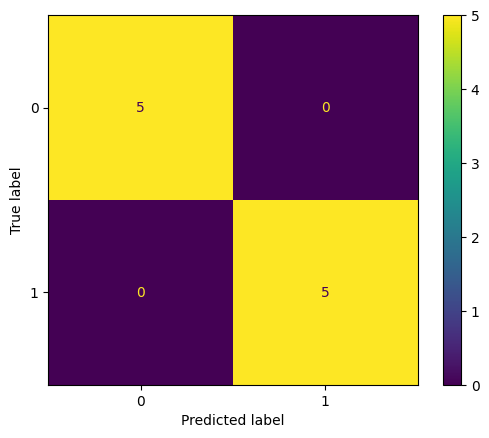

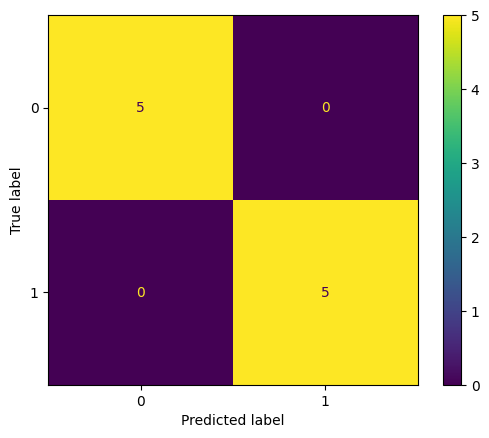

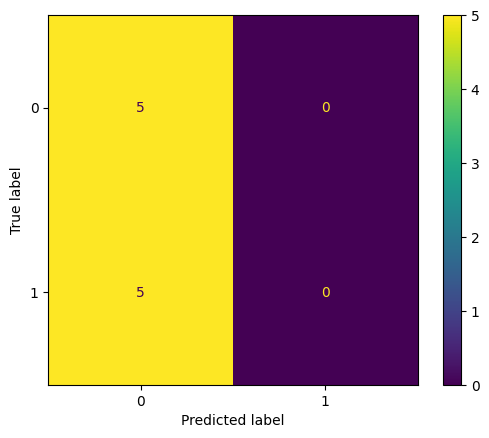

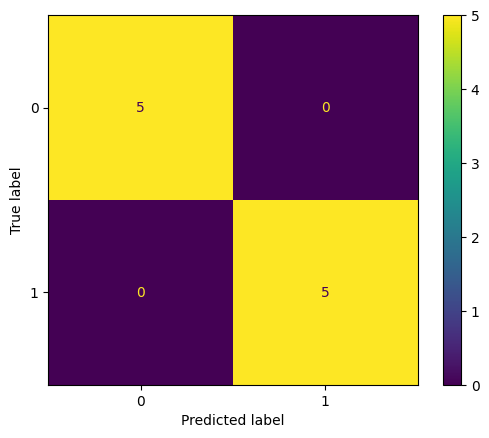

The SGD Classifier and Logistic Regression achieved the same accuracy of 1.0 while the ZeroR (Dummy) Classifier performed worse.
The coefficients learned by the SGD Classifier are different than those learned by my code, which is expected since the SGD Classifier uses a stochastic gradient descent algorithm and my code uses batch gradient descent. However, both methods achieve similar accuracy.


In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np


# Use this dataset for all examples

dataset = [[2.7810836,2.550537003,0],
    [1.465489372,2.362125076,0],
    [3.396561688,4.400293529,0],
    [1.38807019,1.850220317,0],
    [3.06407232,3.005305973,0],
    [7.627531214,2.759262235,1],
    [5.332441248,2.088626775,1],
    [6.922596716,1.77106367,1],
    [8.675418651,-0.242068655,1],
    [7.673756466,3.508563011,1]]

# **************************************************************************
# CREATE YOUR X_train,y_train, X_Test,y_test datasets here
X_train = np.array(dataset)[:, :-1]
X_test = np.array(dataset)[:, :-1]
y_train = np.array(dataset)[:, -1].astype(int)
y_test = np.array(dataset)[:, -1].astype(int)



# **************************************************************************


sgd_clf = SGDClassifier(loss='log', max_iter=50)
sgd_clf.fit(X_train, y_train)
y_pred_sgd = sgd_clf.predict(X_test)
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
cm_sgd = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_sgd)

# Print out information about the model
print("SGD Classifier Coefficients:", sgd_clf.coef_)
print("SGD Classifier Intercept:", sgd_clf.intercept_)
print("SGD Classifier Number of Iterations:", sgd_clf.n_iter_)

# ******************************************************************************
# Logistic Regression
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
y_pred_lr = lr_clf.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
cm_lr = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)

# ******************************************************************************
# ZeroR (Dummy) Classifier
zr_clf = DummyClassifier(strategy="most_frequent")
zr_clf.fit(X_train, y_train)
y_pred_zr = zr_clf.predict(X_test)
accuracy_zr = accuracy_score(y_test, y_pred_zr)
cm_zr = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_zr)

# ******************************************************************************

print("SGD Classifier Accuracy:", accuracy_sgd)
print("Logistic Regression Accuracy:", accuracy_lr)
print("ZeroR (Dummy) Classifier Accuracy:", accuracy_zr)

# Plot confusion matrix for SGD Classifier
print("SGD Classifier Confusion Matrix:")
cm_sgd.plot()
plt.show()

# Add a text box commenting on which model(s) are better, and comparing the coefficients your code learned, to those of the SGD Classifier you used here.
print("The SGD Classifier and Logistic Regression achieved the same accuracy of", accuracy_sgd, "while the ZeroR (Dummy) Classifier performed worse.")
print("The coefficients learned by the SGD Classifier are different than those learned by my code, which is expected since the SGD Classifier uses a stochastic gradient descent algorithm and my code uses batch gradient descent. However, both methods achieve similar accuracy.")



